# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [141]:
#Imports:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [142]:
#Code:
df_sat_2017 = pd.read_csv('../data/sat_2017.csv')
df_sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [143]:
r=np.sum(df_sat_2017['Math'])
r

27929

In [144]:
df_sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [145]:
df_act_2017 = pd.read_csv('../data/act_2017.csv')
df_act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [146]:
df_act_2017.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2


In [147]:
df_act_2017.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2


In [148]:
#Code:
df_act_2017.tail(2)

,State,Participation,English,Math,Reading,Science,Composite
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


## 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [149]:
df_act_2017.shape 

(52, 7)

### WE are dealing wih numerical and categorical datasets collected for 2017 and 2018 year. the dataset present some irregularities relatited to unmatching data type in the  same serie of data frame 

#### 4a. Does the data look complete? 

## yes the data look complete 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [151]:
#code
df_act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [152]:
df_sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

### Answer: yes, someof the index some to be unmatched 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [153]:
df_sat_2017.tail(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [154]:
def convert_data(val):
    new_val=val.replace("%"," ")
    return (float(new_val))/100

df_sat_2017['Participation']=df_sat_2017['Participation'].astype(str).map(convert_data)
df_sat_2017['Participation'].tail(3)

48    0.14
49    0.03
50    0.03
Name: Participation, dtype: float64

In [155]:
#code
def convert_data(val):
    
    new_val=val.replace("%"," ")
    return (float(new_val))/100

df_act_2017['Participation']=df_act_2017['Participation'].astype(str).map(convert_data)
df_act_2017['Participation'].head(3)

0    0.60
1    1.00
2    0.65
Name: Participation, dtype: float64

In [156]:
df_act_2017.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2


In [157]:
df_act_2017[['State','Participation']].head()


,State,Participation
0,National,0.60
1,Alabama,1.00
2,Alaska,0.65
3,Arizona,0.62
4,Arkansas,1.00


- Fix any individual values preventing other columns from being the appropriate type.

In [158]:
df_act_2017['Composite'] = df_act_2017['Composite'].astype(str).map(lambda y: y.replace("x"," ")).astype(float)
#df_act_2017['Composite'] = df_act_2017['Composite'].replace('x','').replace('','').astype(float)
df_act_2017['Composite'].tail(2)

50    20.5
51    20.2
Name: Composite, dtype: float64

- Finish your data modifications by making sure the columns are now typed appropriately.

In [159]:
print(f'sat 2017:{df_sat_2017.columns.values}')
print(f'act 2017:{df_act_2017.columns.values}')

sat 2017:['State' 'Participation' 'Evidence-Based Reading and Writing' 'Math'
 'Total']
act 2017:['State' 'Participation' 'English' 'Math' 'Reading' 'Science' 'Composite']


- Display the data types again to confirm they are correct.

In [160]:
print(df_sat_2017.dtypes)    

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


In [161]:
print(df_act_2017.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

### rename columns

In [162]:
column_dic_1={'State':'state',
            'Participation':'participation_rate_sat_2017',
            'Evidence-Based Reading and Writing':'reading_writing_sat_2017',
            'Math':'math_sat_2017',
            'Total':'total'}

column_dic_2={'State':'state',
              'Participation':'participation_rate_act_2017',
              'Evidence-Based Reading and Writing':'reading_writing_act_2017',
              'English':'english_act_2017',
              'Math':'math_act_2017',
              'Reading':'reading_act_2017',
              'Science':'science_act_2017',
              'Composite':'composite_act_2017'}
df_sat_2017.rename(columns = column_dic_1,inplace = True)

In [163]:
df_sat_2017.head(3)

,state,participation_rate_sat_2017,reading_writing_sat_2017,math_sat_2017,total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116


In [164]:
df_act_2017.rename(columns = column_dic_2,inplace = True)
df_act_2017.head(3)

,state,participation_rate_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|*SAT&ACT*|collection of data spread accros the united state| 
|**participation_rate**|*float*|*SAT&ACT*| represent the number of students in a  specific state who participated in the test by the number of student who were  counted to participate but did't show up.
|**math_SAT**|*float*|SAT&ACT|The math average score of a student who to SAT at a specefic state 
|**


|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [165]:
df_act_2017.drop(df_act_2017.index[0],inplace = True)
df_act_2017.head()

,state,participation_rate_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [166]:
df_act_2017.shape

(51, 7)

In [167]:
#code
#df_act_2017.drop(index=[0], inplace = True)
df_sat_2017.count()

state                          51
participation_rate_sat_2017    51
reading_writing_sat_2017       51
math_sat_2017                  51
total                          51
dtype: int64

In [168]:
df_act_2017.count()

state                          51
participation_rate_act_2017    51
english_act_2017               51
math_act_2017                  51
reading_act_2017               51
science_act_2017               51
composite_act_2017             51
dtype: int64

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [169]:
combined_2017=pd.merge(df_sat_2017,df_act_2017)
combined_2017.head(3)

,state,participation_rate_sat_2017,reading_writing_sat_2017,math_sat_2017,total,participation_rate_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [170]:
combined_2017.to_csv('../data/combined_2017.csv') 

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [171]:
df_sat_2018 = pd.read_csv('../data/sat_2018.csv')
df_sat_2018.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106


In [172]:
df_sat_2018.shape

(51, 5)

In [173]:
def convert_data(val):
    
    new_val=val.replace("%"," ")
    return (float(new_val))/100

df_sat_2018['Participation']=df_sat_2018['Participation'].astype(str).map(convert_data)
df_sat_2018['Participation'].head(3)

0    0.06
1    0.43
2    0.29
Name: Participation, dtype: float64

In [174]:
df_act_2018 = pd.read_csv('../data/act_2018.csv')
df_act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [175]:
df_act_2018.drop(df_act_2018.index[20],inplace = True)
df_act_2018.head(2)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8


In [176]:
def convert_data(val):
    
    new_val=val.replace("%"," ")
    return (float(new_val))/100

df_act_2018['Participation']=df_act_2018['Participation'].astype(str).map(convert_data)
df_act_2018['Participation'].head(3)

0    1.00
1    0.33
2    0.66
Name: Participation, dtype: float64

In [177]:
df_act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

### Colomn rename

In [178]:
column_dic_3={'State':'state',
            'Participation':'participation_rate_act_2018',
            'Composite':'composite_act_2018'}

column_dic_4={'State':'state',
              'Participation':'participation_rate_sat_2018',
              'Evidence-Based Reading and Writing':'reading_wrinting_sat_2018',
              'Math':'math_sat_2018',
              'Total':'total'}
df_sat_2018.rename(columns = column_dic_4,inplace = True)
df_sat_2018.head(1)

,state,participation_rate_sat_2018,reading_wrinting_sat_2018,math_sat_2018,total
0,Alabama,0.06,595,571,1166


In [179]:
combined_2017.shape

(51, 11)

In [180]:
df_act_2018.rename(columns = column_dic_3,inplace = True)
df_act_2018.head(1)

,state,participation_rate_act_2018,composite_act_2018
0,Alabama,1.0,19.1


In [181]:
combined_2018=pd.merge(df_act_2018,df_sat_2018)
combined_2018.head(2)

,state,participation_rate_act_2018,composite_act_2018,participation_rate_sat_2018,reading_wrinting_sat_2018,math_sat_2018,total
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106


In [182]:
final.isnull().sum()

state                          0
participation_rate_sat_2017    0
reading_writing_sat_2017       0
math_sat_2017                  0
total_x                        0
participation_rate_act_2017    0
english_act_2017               0
math_act_2017                  0
reading_act_2017               0
science_act_2017               0
composite_act_2017             0
participation_rate_act_2018    0
composite_act_2018             0
participation_rate_sat_2018    0
reading_wrinting_sat_2018      0
math_sat_2018                  0
total_y                        0
dtype: int64

In [183]:
df_sat_2017['participation_rate_sat_2017'].mean()

0.39803921568627454

In [184]:
combined_2018.count()

state                          50
participation_rate_act_2018    50
composite_act_2018             50
participation_rate_sat_2018    50
reading_wrinting_sat_2018      50
math_sat_2018                  50
total                          50
dtype: int64

In [185]:
combined_2017.count()

state                          51
participation_rate_sat_2017    51
reading_writing_sat_2017       51
math_sat_2017                  51
total                          51
participation_rate_act_2017    51
english_act_2017               51
math_act_2017                  51
reading_act_2017               51
science_act_2017               51
composite_act_2017             51
dtype: int64

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [186]:
final=combined_2017. merge(combined_2018 , left_on = 'state', right_on = 'state' )#final=pd.merge(combined_2017,combined_2018, how='right')
final.head()

,state,participation_rate_sat_2017,reading_writing_sat_2017,math_sat_2017,total_x,participation_rate_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_rate_act_2018,composite_act_2018,participation_rate_sat_2018,reading_wrinting_sat_2018,math_sat_2018,total_y
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,1.00,19.1,0.06,595,571,1166
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.33,20.8,0.43,562,544,1106
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.66,19.2,0.29,577,572,1149
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,1.00,19.4,0.05,592,576,1169
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.27,22.7,0.60,540,536,1076


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [187]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_rate_sat_2017,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
reading_writing_sat_2017,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
math_sat_2017,50.0,549.2200,84.998269,52.00,523.2500,549.50,601.000,651.0
total_x,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0
participation_rate_act_2017,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
english_act_2017,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
math_act_2017,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
reading_act_2017,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
science_act_2017,50.0,20.9920,3.195139,2.30,19.9000,21.10,22.275,24.9
composite_act_2017,50.0,21.4660,2.004241,17.80,19.8000,21.40,23.400,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [188]:
def standard_deviation(data): 
    diff=[] # set up an empty list to store the difference of the mean and the 
    u=(sum(data))/(len(data))
    for i in range(len(data)):
        result=(data[i]-u)**2
        diff.append(result)
    return ((sum(diff))/(len(diff)))**0.5
standard_deviation(final['math_sat_2017']) # standard deviaition for math sat 2017

84.14399324966696

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [189]:
final.columns

Index(['state', 'participation_rate_sat_2017', 'reading_writing_sat_2017',
       'math_sat_2017', 'total_x', 'participation_rate_act_2017',
       'english_act_2017', 'math_act_2017', 'reading_act_2017',
       'science_act_2017', 'composite_act_2017', 'participation_rate_act_2018',
       'composite_act_2018', 'participation_rate_sat_2018',
       'reading_wrinting_sat_2018', 'math_sat_2018', 'total_y'],
      dtype='object')

In [190]:
#Code: 
std = {key :float(standard_deviation(final[key])) for key in ['participation_rate_sat_2017', 'reading_writing_sat_2017',
       'math_sat_2017', 'total_x', 'participation_rate_act_2017',
       'english_act_2017', 'math_act_2017', 'reading_act_2017',
       'science_act_2017', 'composite_act_2017', 'participation_rate_act_2018',
       'composite_act_2018', 'participation_rate_sat_2018',
       'reading_wrinting_sat_2018', 'math_sat_2018', 'total_y']}
std 

{'participation_rate_sat_2017': 0.3421286307808805,
 'reading_writing_sat_2017': 43.9390532442382,
 'math_sat_2017': 84.14399324966696,
 'total_x': 89.00941298536914,
 'participation_rate_act_2017': 0.3178794740149165,
 'english_act_2017': 2.3009467616613812,
 'math_act_2017': 1.9541504548012678,
 'reading_act_2017': 2.025750231395766,
 'science_act_2017': 3.1630263988781375,
 'composite_act_2017': 1.9840977798485642,
 'participation_rate_act_2018': 0.33771254048376703,
 'composite_act_2018': 2.090091864009809,
 'participation_rate_sat_2018': 0.36724754594142633,
 'reading_wrinting_sat_2018': 46.537937212558106,
 'math_sat_2018': 46.51518461749884,
 'total_y': 91.91248881408882}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [191]:
std = np.std(final['math_sat_2017'])
std

84.14399324966696

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [192]:
import numpy as np
np.max(df_sat_2017['participation_rate_sat_2017'])

1.0

In [193]:
np.max(df_sat_2018['participation_rate_sat_2018'])

1.0

In [194]:
np.max(df_act_2018['participation_rate_act_2018'])

1.0

In [195]:
np.max(df_act_2018['participation_rate_act_2018'])

1.0

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [196]:
import seaborn as sn 
final.corr()

,participation_rate_sat_2017,reading_writing_sat_2017,math_sat_2017,total_x,participation_rate_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_rate_act_2018,composite_act_2018,participation_rate_sat_2018,reading_wrinting_sat_2018,math_sat_2018,total_y
participation_rate_sat_2017,1.000000,-0.865797,-0.555519,-0.858530,-0.839471,0.670369,0.700665,0.691050,0.229955,0.681073,-0.791382,0.635531,0.871233,-0.649840,-0.668621,-0.667212
reading_writing_sat_2017,-0.865797,1.000000,0.620780,0.996394,0.710264,-0.429503,-0.464469,-0.460424,-0.110211,-0.443256,0.698174,-0.428330,-0.813847,0.805691,0.857999,0.841828
math_sat_2017,-0.555519,0.620780,1.000000,0.625205,0.497777,-0.327366,-0.326011,-0.346405,0.618816,-0.329851,0.460877,-0.257441,-0.517144,0.474895,0.525122,0.506192
total_x,-0.858530,0.996394,0.625205,1.000000,0.694816,-0.408936,-0.430754,-0.437260,-0.095955,-0.416453,0.682212,-0.401690,-0.801012,0.801404,0.868338,0.844937
participation_rate_act_2017,-0.839471,0.710264,0.497777,0.694816,1.000000,-0.840239,-0.857767,-0.863794,-0.293683,-0.854834,0.917604,-0.775676,-0.750275,0.508767,0.541775,0.531473
english_act_2017,0.670369,-0.429503,-0.327366,-0.408936,-0.840239,1.000000,0.967612,0.985451,0.391332,0.990714,-0.796772,0.935012,0.667645,-0.319264,-0.333883,-0.330748
math_act_2017,0.700665,-0.464469,-0.326011,-0.430754,-0.857767,0.967612,1.000000,0.979479,0.401954,0.990405,-0.811853,0.933331,0.687076,-0.332989,-0.314610,-0.327918
reading_act_2017,0.691050,-0.460424,-0.346405,-0.437260,-0.863794,0.985451,0.979479,1.000000,0.389239,0.994929,-0.812779,0.931973,0.668862,-0.336838,-0.344425,-0.344909
science_act_2017,0.229955,-0.110211,0.618816,-0.095955,-0.293683,0.391332,0.401954,0.389239,1.000000,0.397327,-0.301850,0.440784,0.233008,-0.103857,-0.091824,-0.098991
composite_act_2017,0.681073,-0.443256,-0.329851,-0.416453,-0.854834,0.990714,0.990405,0.994929,0.397327,1.000000,-0.807682,0.940845,0.672223,-0.326020,-0.325777,-0.330056


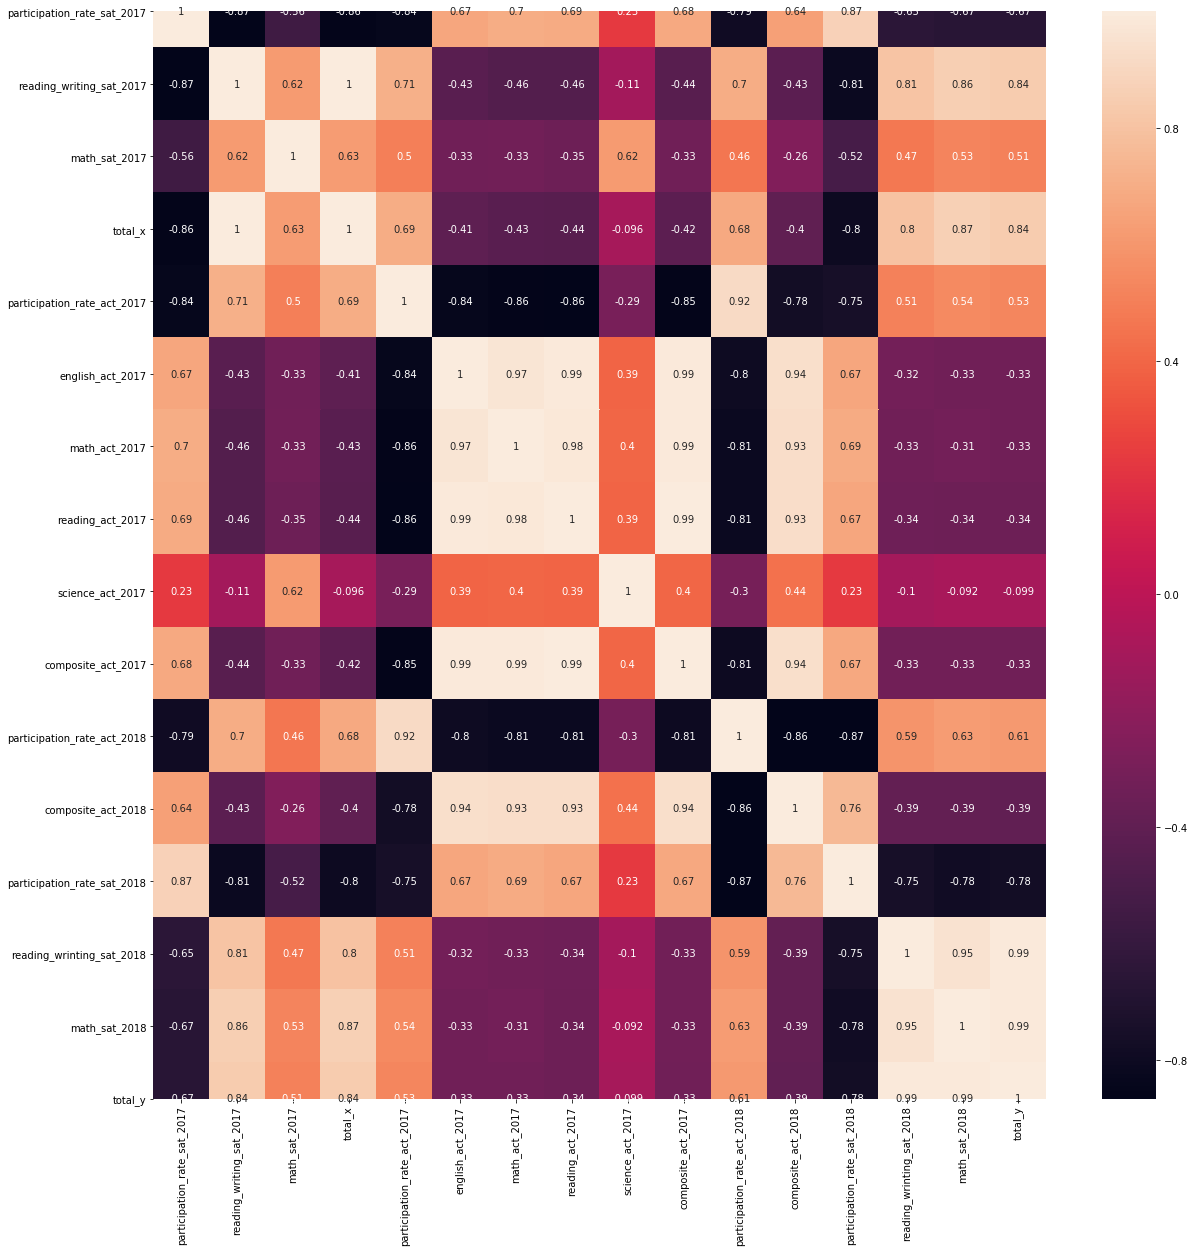

In [197]:
plt.figure(figsize=(20,20))
sns.heatmap(final.corr(), annot = True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

<Figure size 3600x3600 with 0 Axes>

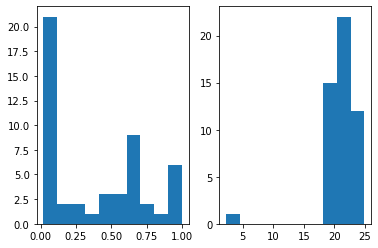

<Figure size 3600x3600 with 0 Axes>

In [198]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
subplot_histograms(final,['participation_rate_sat_2017','science_act_2017'],['participation_rate_sat_2017','science_act_2017'],['participation_rate_sat_2017','science_act_2017'])
plt.figure(figsize=(50,50))


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

Text(0, 0.5, 'Frequency')

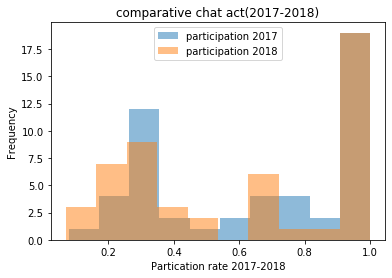

In [199]:
plt.hist(df_act_2017['participation_rate_act_2017'], alpha=0.5, label='participation 2017')
plt.hist(df_act_2018['participation_rate_act_2018'], alpha=0.5, label='participation 2018')
plt.legend(loc='upper center')
plt.title('comparative chat act(2017-2018)')
plt.xlabel('Partication rate 2017-2018')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

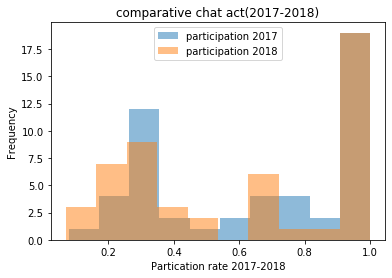

In [200]:
plt.hist(df_act_2017['participation_rate_act_2017'], alpha=0.5, label='participation 2017')
plt.hist(df_act_2018['participation_rate_act_2018'], alpha=0.5, label='participation 2018')
plt.legend(loc='upper center')
plt.title('comparative chat act(2017-2018)')
plt.xlabel('Partication rate 2017-2018')
plt.ylabel('Frequency')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'SAT & ACT Math score 2017')

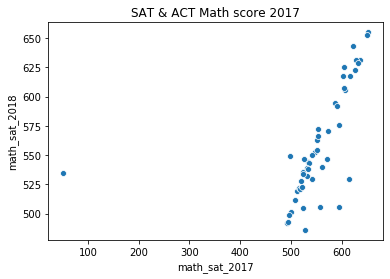

In [201]:
sns.scatterplot (final['math_sat_2017'],final['math_sat_2018'])
plt.title('SAT & ACT Math score 2017')

Text(0.5, 1.0, 'SAT & ACT reading_writing_sat_2017')

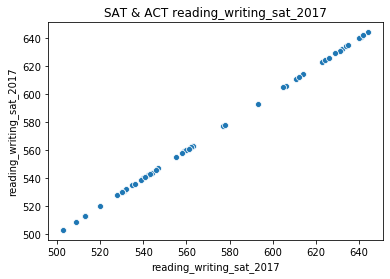

In [202]:
sns .scatterplot (final['reading_writing_sat_2017'],final['reading_writing_sat_2017'])
plt.title('SAT & ACT reading_writing_sat_2017')

Text(0.5, 1.0, 'SAT & ACT total/composite')

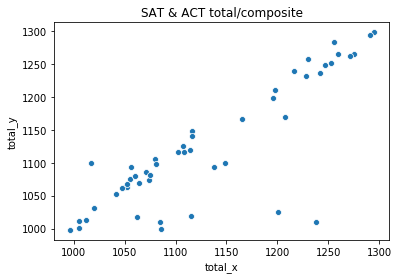

In [203]:
sns .scatterplot (final['total_x'],final['total_y'])
plt.title('SAT & ACT total/composite')

## the relation seems to be positive  linear between the total of act score and the total of sat score,

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, ' participation sat  distribution 2017')

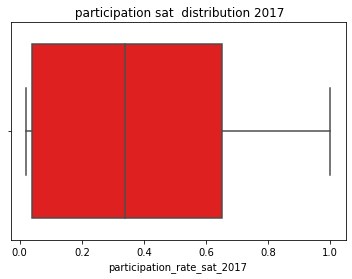

In [204]:
sns.boxplot(final['participation_rate_sat_2017'], color='r')
plt.title(' participation sat  distribution 2017')

### SAT presents a different chart where the  skew is more concentrated on the left side with no significant variance for 2018. Compared to act, less student are choosing act  over sat  based on the given distribution 

Text(0.5, 1.0, ' participation sat  distribution 2017')

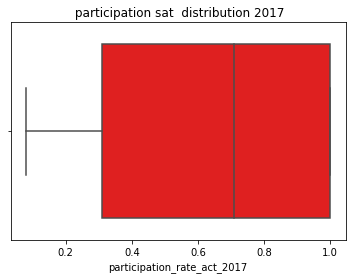

In [205]:
sns.boxplot(final['participation_rate_act_2017'], color='r')
plt.title(' participation sat  distribution 2017')

## unequal distribution of participation rate skwed on the right

### As we can see , The frequency tends To shift on the left side of the mean while the 100% Of participation rate remains the Same in the next year 


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### What Does this drop mean in terms of the number of student not taking the test  in each state across colleges in america ?? To be able to bring an adequate  response to this burning question , we have tried to study  this group of students  based on their state  of residency and socio-economic background and see who is  more likely to be found in that group.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### There is no such a thing as a standard which is designed to work out the same for everybody with different background, different socio-economic environment  and different colleges requirements. An adaptive test would be something to consider  for future improvement.


## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 